# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.465892e+01     1.716706e+01
 * time: 0.0030698776245117188
     1     6.564707e+01     1.018560e+01
 * time: 0.009173870086669922
     2     5.855772e+01     1.117976e+01
 * time: 0.0223538875579834
     3     4.332336e+01     1.005994e+01
 * time: 0.04030489921569824
     4     3.284038e+01     9.111023e+00
 * time: 0.05827593803405762
     5     2.865867e+01     8.092787e+00
 * time: 0.07396793365478516
     6     1.425741e+01     2.245998e+00
 * time: 0.08939886093139648
     7     1.319442e+01     4.157865e+00
 * time: 0.15542101860046387
     8     1.159360e+01     3.283415e+00
 * time: 0.16910600662231445
     9     1.061723e+01     3.256131e+00
 * time: 0.18208599090576172
    10     9.941905e+00     4.446929e+00
 * time: 0.19498491287231445
    11     8.725013e+00     2.252228e+00
 * time: 0.2078559398651123
    12     7.578585e+00     1.827392e+00
 * time: 0.22092700004577637
    13     7.007404e+00     2.221164e+00
 * time

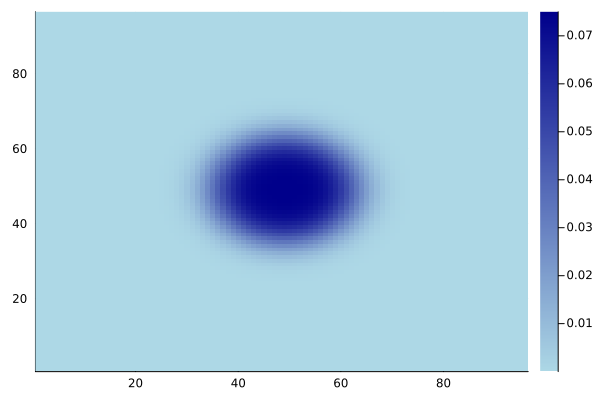

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)